# Big Data Science -  Exercise 1 
### Movie Industry Exploring  

## Delivered by:
- Or Segal - 204265557  
- Omer Gross - 305470916
- Omri Shushan - 201377165

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
# Inline plotting
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Q.1

In [3]:
df = pd.read_csv("movies_6K_clean.csv",encoding='latin1')

## Q.2

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
budget      4638 non-null float64
company     6820 non-null object
country     6820 non-null object
director    6820 non-null object
genre       6820 non-null object
gross       6820 non-null int64
name        6820 non-null object
rating      6820 non-null object
released    6820 non-null object
runtime     6820 non-null int64
score       6820 non-null float64
star        6820 non-null object
votes       6820 non-null int64
writer      6820 non-null object
year        6820 non-null int64
dtypes: float64(2), int64(4), object(9)
memory usage: 799.3+ KB


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,6000.0,Next Wave Films,UK,Christopher Nolan,Crime,48482,Following,R,11/5/1999,69,7.6,Jeremy Theobald,72113,Christopher Nolan,1998
1,7000.0,ERBP,USA,Shane Carruth,Drama,424760,Primer,PG-13,5/27/2005,77,6.9,Shane Carruth,81468,Shane Carruth,2004
2,7000.0,Columbia Pictures Corporation,USA,Robert Rodriguez,Action,2040920,El Mariachi,R,2/26/1993,81,6.9,Carlos Gallardo,55226,Robert Rodriguez,1992
3,15000.0,Can I Watch,USA,Rose Troche,Drama,2408311,Go Fish,R,7/8/1994,83,5.6,V.S. Brodie,1742,Rose Troche,1994
4,15000.0,Solana Films,USA,Oren Peli,Horror,107918810,Paranormal Activity,R,10/16/2009,86,6.3,Katie Featherston,195668,Oren Peli,2007


## Q.3

In [5]:
df.describe()

,budget,gross,runtime,score,votes,year
count,4.638000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,3.614560e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.996947e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,6.000000e+03,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,1.000000e+07,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,2.300000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,4.600000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


## Q.4
### How many genres there is in the table? you can use the describe function for object types describe(include=np.object)

In [6]:
g = pd.Series(df.genre)
g.describe()

count       6820
unique        17
top       Comedy
freq        2080
Name: genre, dtype: object

### Answer: 
#### There are 17 unique genres.

### How many movies are from each genre in each county?

In [7]:
d = df.groupby(['genre','country']).count()
pd.DataFrame(pd.Series(d['name']))


name
genre    country        
Action   Aruba         1
         Australia    12
         Austria       1
         Belgium       1
         Brazil        2
...                  ...
Thriller Australia     1
         UK            4
         USA          13
War      USA           2
Western  UK            2

[238 rows x 1 columns]

### How many movies are from each genre in each year? Is there a trend?

In [8]:
d = df.groupby(['genre','year']).count()
ns = pd.DataFrame(pd.Series(d['name']))
ns

name
genre    year      
Action   1986    49
         1987    47
         1988    35
         1989    46
         1990    46
...             ...
Thriller 2010     2
         2015     1
War      1988     2
Western  1993     1
         2015     1

[342 rows x 1 columns]

### What is the average score for each genre for each year?

In [9]:
p = df.groupby(['genre','year']).mean()
ps = pd.DataFrame(pd.Series(p['score']))
ps

score
genre    year          
Action   1986  5.461224
         1987  5.814894
         1988  6.054286
         1989  5.908696
         1990  5.930435
...                 ...
Thriller 2010  6.300000
         2015  5.200000
War      1988  6.400000
Western  1993  5.500000
         2015  6.900000

[342 rows x 1 columns]

### What is the average gross revenue for each genre for each year?

In [10]:
g = df.groupby(['genre','year']).mean()
gs = pd.DataFrame(pd.Series(g['gross']))
gs

gross
genre    year              
Action   1986  1.719653e+07
         1987  1.756258e+07
         1988  2.078239e+07
         1989  2.718059e+07
         1990  3.019161e+07
...                     ...
Thriller 2010  1.321750e+05
         2015  1.645800e+04
War      1988  7.548875e+05
Western  1993  1.829000e+07
         2015  2.290940e+05

[342 rows x 1 columns]

### What is the most frequesnt star and director from the movie file?

In [11]:
star = df['star'].value_counts()[:1]
star

Nicolas Cage    42
Name: star, dtype: int64

In [12]:
direc = df['director'].value_counts()[:1]
direc

Woody Allen    33
Name: director, dtype: int64

### What is the average gross from it's movies? To answer that create additional data frame.

In [13]:
s ={'star':['Nicolas Cage','Woody Allen'], 'num_movies':[42,33]}
dff = pd.DataFrame(data=s)
dff

,star,num_movies
0,Nicolas Cage,42
1,Woody Allen,33


In [14]:
pp = df.loc[df['star'] == 'Nicolas Cage',['star','name','gross']]
pf = df.loc[df['director'] == 'Woody Allen',['director','name','gross']]
grosses = pp.mean().tolist()
grosses.append(np.asscalar(pf.mean()))
grosses

C:\Users\Omri\Anaconda3\lib\site-packages\numpy\lib\type_check.py:547: FutureWarning: `item` has been deprecated and will be removed in a future version
  return a.item()


[43798693.26190476, 12205720.909090908]

In [15]:
dff.insert(loc=2, column='avg_movies_gross',value=grosses)
dff

,star,num_movies,avg_movies_gross
0,Nicolas Cage,42,4.379869e+07
1,Woody Allen,33,1.220572e+07


### Q.5. Boxplots - Visualizations

Text(0, 0.5, 'Nicolas Cage movie revenue')

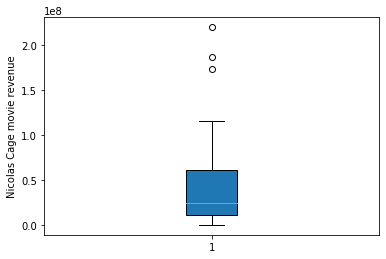

In [16]:
plt.boxplot(pp.gross ,meanline=True ,vert=True ,patch_artist=True,autorange=True)
plt.ylabel("Nicolas Cage movie revenue") 

In [17]:
pp.describe()

,gross
count,4.200000e+01
mean,4.379869e+07
std,5.224437e+07
min,1.681600e+04
25%,1.115078e+07
50%,2.389658e+07
75%,6.125959e+07
max,2.199641e+08


Text(0, 0.5, 'Woody Allen movie revenue')

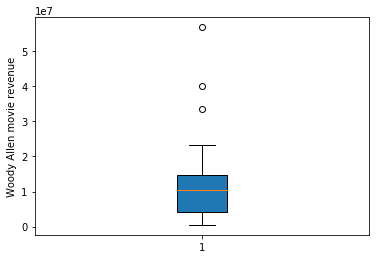

In [18]:
plt.boxplot(pf.gross ,meanline=True ,vert=True ,patch_artist=True ,autorange=True)
plt.ylabel("Woody Allen movie revenue") 

In [19]:
pf.describe()

,gross
count,3.300000e+01
mean,1.220572e+07
std,1.202207e+07
min,4.864340e+05
25%,4.196621e+06
50%,1.050694e+07
75%,1.479278e+07
max,5.681666e+07


### Q.6  the features

In [20]:
df.describe()

,budget,gross,runtime,score,votes,year
count,4.638000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,3.614560e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.996947e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,6.000000e+03,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,1.000000e+07,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,2.300000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,4.600000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


### Q.7.a.1

Text(0, 0.5, 'gross')

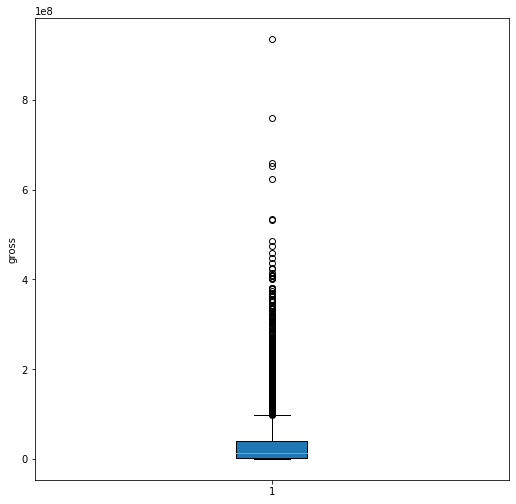

In [21]:
plt.figure(figsize=[8.5,8.5])
plt.boxplot(df.gross ,meanline=True ,vert=True ,patch_artist=True ,autorange=False)
plt.ylabel('gross')

### Q.7.a.2 Answer:
#### The disturbiution is non-symmetric, there is a lot of outliners in the top.
#### most of the movies (interquartile range) revenue is between: 1.515839e+06 AND 4.006534e+07

### Q.7.a.3.

Text(0, 0.5, 'gross revenue')

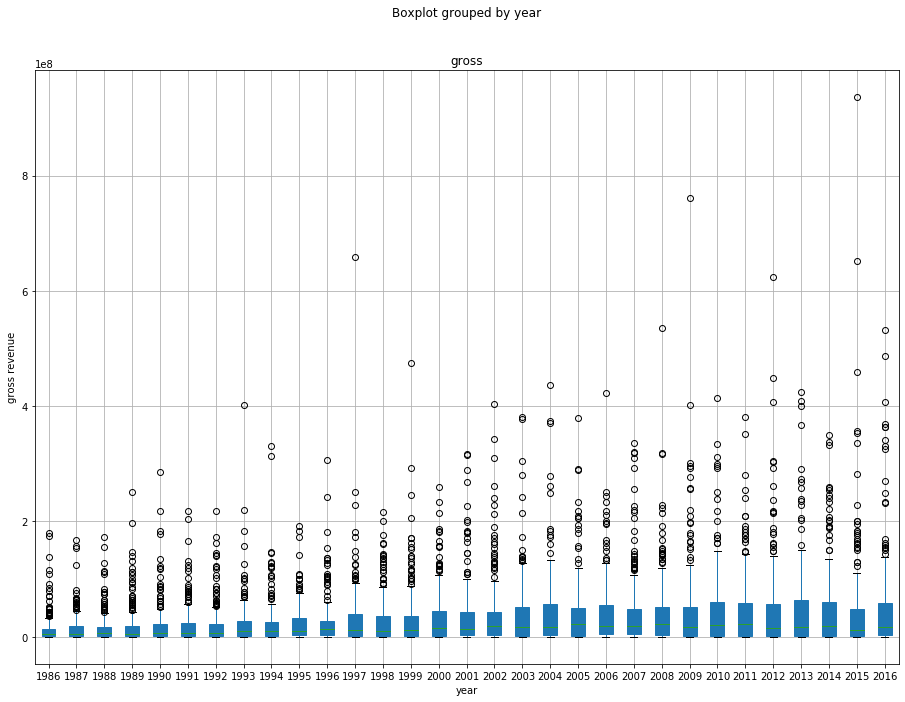

In [22]:
fig, ax = plt.subplots(figsize=(15,11))
df.boxplot(column=['gross'] ,by='year' ,meanline=True ,vert=True ,patch_artist=True ,autorange=False, ax=ax)
plt.ylabel('gross revenue')

### The revenue movie raises over the years

### Q.7.a.4

Text(0, 0.5, 'gross revenue')

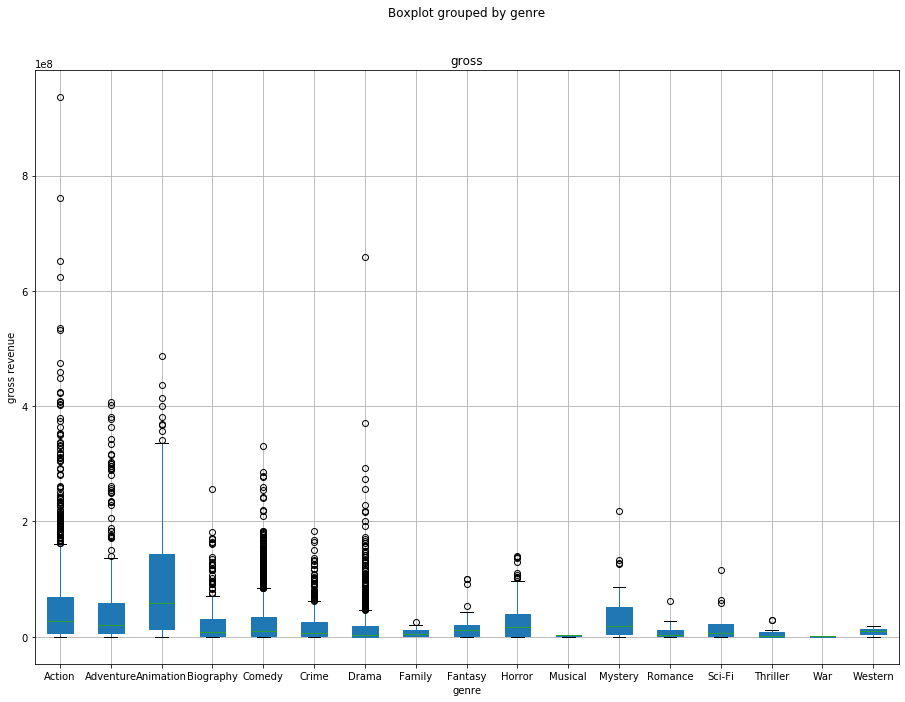

In [23]:
fig, ax = plt.subplots(figsize=(15,11))
df.boxplot(column=['gross'] ,by='genre' ,meanline=True ,vert=True ,patch_artist=True ,autorange=False, ax=ax)
plt.ylabel('gross revenue')

### Q.7.b - histogram

### Q.7.b.2.

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 <a list of 10 Text yticklabel objects>)

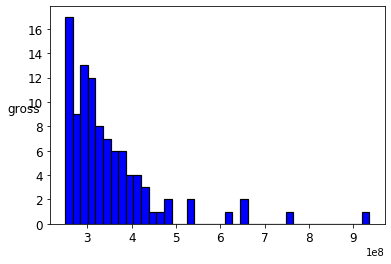

In [24]:
top100 = df.nlargest(100, 'gross')
plt.hist(top100['gross'],color='b',edgecolor='black', linewidth=1.2, bins=40)
plt.xlabel("", fontsize=12)  
plt.ylabel("gross", fontsize=12,rotation=0)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text yticklabel objects>)

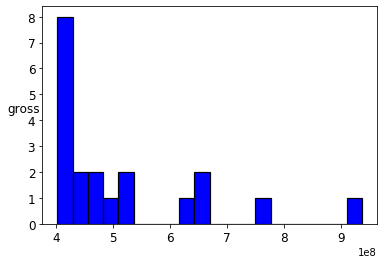

In [25]:
top20 = df.nlargest(20, 'gross')
plt.hist(top20['gross'],color='b',edgecolor='black', linewidth=1.2, bins=20)
plt.xlabel("", fontsize=12)  
plt.ylabel("gross", fontsize=12,rotation=0)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)

### Q.7.b.3. 

In [26]:
revenue = df['gross']
revenue.describe()

count    6.820000e+03
mean     3.349783e+07
std      5.819760e+07
min      7.000000e+01
25%      1.515839e+06
50%      1.213568e+07
75%      4.006534e+07
max      9.366622e+08
Name: gross, dtype: float64

#### The most common range is between 25%  to 75%

In [27]:
q1 = df['gross'].quantile(.25)
q3 = df['gross'].quantile(.75)
iqr = q3-q1
iqr

38549501.5

### Q.7.b.4 
 ### gross revenue over 500M USD

In [28]:
c = df.loc[df['gross'] > 500000000]['gross'].count()
c

7

### Q.7.b.5

In [29]:
df1 = pd.DataFrame(df, columns=['runtime','score', 'gross'])
#  correlation matrix
df1.corr()


,runtime,score,gross
runtime,1.000000,0.395343,0.224579
score,0.395343,1.000000,0.165693
gross,0.224579,0.165693,1.000000


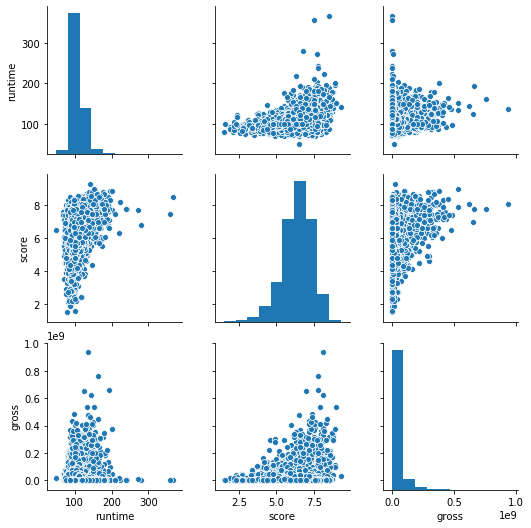

In [30]:
sns.pairplot(df1)

### Q.8.a - Categorical Features

In [31]:
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

#### features that cant be used as input: company, country, director, genre, released, writer, star, year. 
#### Two methods that are dealling with categorical variables: one-hot encode and Ordinal Encoding.
#### Create Dummies on Years:

In [32]:
from sklearn import preprocessing

bins = [1986, 1990, 2000, 2010, 2020]
group_names = ["80's", "90's", "2000-2010", "2010-2020"]
df['year_dec']=pd.cut(df['year'], bins,labels= group_names)
df.head(n=10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_dec
0,6000.0,Next Wave Films,UK,Christopher Nolan,Crime,48482,Following,R,11/5/1999,69,7.6,Jeremy Theobald,72113,Christopher Nolan,1998,90's
1,7000.0,ERBP,USA,Shane Carruth,Drama,424760,Primer,PG-13,5/27/2005,77,6.9,Shane Carruth,81468,Shane Carruth,2004,2000-2010
2,7000.0,Columbia Pictures Corporation,USA,Robert Rodriguez,Action,2040920,El Mariachi,R,2/26/1993,81,6.9,Carlos Gallardo,55226,Robert Rodriguez,1992,90's
3,15000.0,Can I Watch,USA,Rose Troche,Drama,2408311,Go Fish,R,7/8/1994,83,5.6,V.S. Brodie,1742,Rose Troche,1994,90's
4,15000.0,Solana Films,USA,Oren Peli,Horror,107918810,Paranormal Activity,R,10/16/2009,86,6.3,Katie Featherston,195668,Oren Peli,2007,2000-2010
5,20000.0,Professor Bright Films,USA,Ben Coccio,Drama,7221,Zero Day,UNRATED,1/23/2004,92,7.3,Cal Robertson,3594,Ben Coccio,2003,2000-2010
6,22769.0,Desperate Pictures,USA,Gregg Araki,Comedy,692585,The Living End,UNRATED,8/21/1992,81,6.5,Mike Dytri,2140,Gregg Araki,1992,90's
7,23000.0,Detour Filmproduction,USA,Richard Linklater,Comedy,1228108,Slacker,R,7/5/1991,97,7.1,Richard Linklater,16396,Richard Linklater,1991,90's
8,25000.0,Alliance Atlantis Communications,Canada,Neil LaBute,Comedy,2856622,In the Company of Men,R,8/1/1997,97,7.3,Aaron Eckhart,11992,Neil LaBute,1997,90's
9,25000.0,Brothers McMullen Productions,USA,Edward Burns,Comedy,10246600,The Brothers McMullen,R,8/9/1995,98,6.6,Jack Mulcahy,6598,Edward Burns,1995,90's


### Q.8.b Standardization

In [33]:
x = df['votes']
print("Mean: ",  x.mean(), "Std: ", x.std())

Mean:  71219.52258064516 Std:  130517.63080661323


In [34]:
factor=((len(x)-1)/(len(x)))**0.5
factor
standardized = (x-x.mean())/(x.std()*factor)
df['votes_standart'] = pd.Series(standardized, index=df.index)
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_dec,votes_standart
0,6000.0,Next Wave Films,UK,Christopher Nolan,Crime,48482,Following,R,11/5/1999,69,7.6,Jeremy Theobald,72113,Christopher Nolan,1998,90's,0.006846
1,7000.0,ERBP,USA,Shane Carruth,Drama,424760,Primer,PG-13,5/27/2005,77,6.9,Shane Carruth,81468,Shane Carruth,2004,2000-2010,0.078528
2,7000.0,Columbia Pictures Corporation,USA,Robert Rodriguez,Action,2040920,El Mariachi,R,2/26/1993,81,6.9,Carlos Gallardo,55226,Robert Rodriguez,1992,90's,-0.122548
3,15000.0,Can I Watch,USA,Rose Troche,Drama,2408311,Go Fish,R,7/8/1994,83,5.6,V.S. Brodie,1742,Rose Troche,1994,90's,-0.532362
4,15000.0,Solana Films,USA,Oren Peli,Horror,107918810,Paranormal Activity,R,10/16/2009,86,6.3,Katie Featherston,195668,Oren Peli,2007,2000-2010,0.953569


In [35]:
df['votes_standart'].describe()

count    6.820000e+03
mean     8.627833e-19
std      1.000073e+00
min     -5.455029e-01
25%     -4.869758e-01
50%     -3.473121e-01
75%      3.519114e-02
max      1.371905e+01
Name: votes_standart, dtype: float64

### Handling Missing Data - dropna(), fillna()

### Q.9

In [36]:
df.isna().sum()

budget            2182
company              0
country              0
director             0
genre                0
gross                0
name                 0
rating               0
released             0
runtime              0
score                0
star                 0
votes                0
writer               0
year                 0
year_dec           220
votes_standart       0
dtype: int64

### 2182 rows missing at budget column and 220 at year column

### Q.10.1
### if we want reliable result at reggretion, all rows must be none zero values.

### Q.10.2 Q.10.3 - remove null:


In [37]:
df_no_missing=df.dropna()
df_no_missing.isna().sum()

budget            0
company           0
country           0
director          0
genre             0
gross             0
name              0
rating            0
released          0
runtime           0
score             0
star              0
votes             0
writer            0
year              0
year_dec          0
votes_standart    0
dtype: int64

### Q.11 - Deleting Missing data
#### props: we get more relaible result from the anlysis
#### cons: we loose data that can help us understand about other target
#### We can fill the missing value in the mean of the column.